# Laboratory wokrk 2

Geometric coordinate transformations on the plane

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import math

In [2]:
def plot_presentation(xy):
    plt.figure(figsize=(6, 6))
    plt.plot(xy[:, 0], xy[:, 1], '.') 

    plt.axhline(0, color='black', linewidth=0.5)  
    plt.axvline(0, color='black', linewidth=0.5)  


    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)


def plot_sym(xy_sym_1):
    plt.plot(xy_sym_1[:, 0], xy_sym_1[:, 1], ".-", [-3, 3], [0, 0], color = "blue")
    plt.plot(xy[:, 0], xy[:, 1], ".-", [0, 0], [-3, 3], color = "pink")
    plt.axis('equal')
    plt.show()

def plot_sym_1(xy_original, xy_symmetrical):
    plt.figure(figsize=(8, 8))
    
    plt.plot(xy_original[:, 0], xy_original[:, 1], ".-", color="pink", label="Оригінал")
    
    plt.plot(xy_symmetrical[:, 0], xy_symmetrical[:, 1], ".-", color="blue", label="Симетричні")
    
    plt.axhline(0, color='black', linewidth=0.5)  
    plt.axvline(0, color='black', linewidth=0.5)  
    
    plt.axis('equal')
    
    plt.legend()
    plt.grid(True)
    plt.show()

# Task 1

Задати вершини довільного опуклого 8-кутника на площині. Зменшити його в 1,5 рази

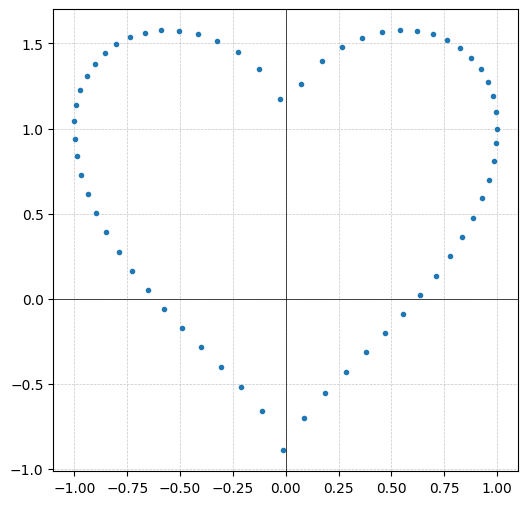

In [3]:
t = np.arange(0, 2 * np.pi, 0.1)

x = np.cos(t)
y = np.sin(t) + np.abs(np.cos(t))**0.5

xy = np.column_stack((x, y)) 

plot_presentation(xy)

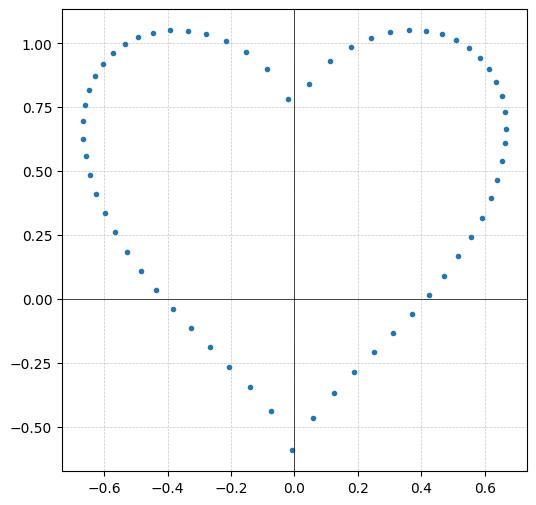

In [4]:
xy_1 = xy / 1.5

plot_presentation(xy_1)

In [5]:
def task_4(xy): 
    one = np.ones((xy.shape[0], 1))
    xy_2_1 = np.hstack((xy, one))

    s = np.array([
        [1/1.5, 0, 0],
        [0, 1/1.5, 0],
        [0, 0, 1]
    ])

    xy_2 = np.dot(xy_2_1, s.T)

    plot_presentation(xy_2)

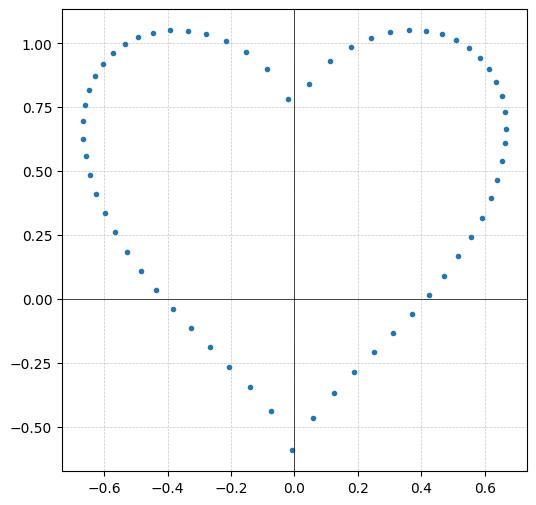

In [6]:
task_4(xy)

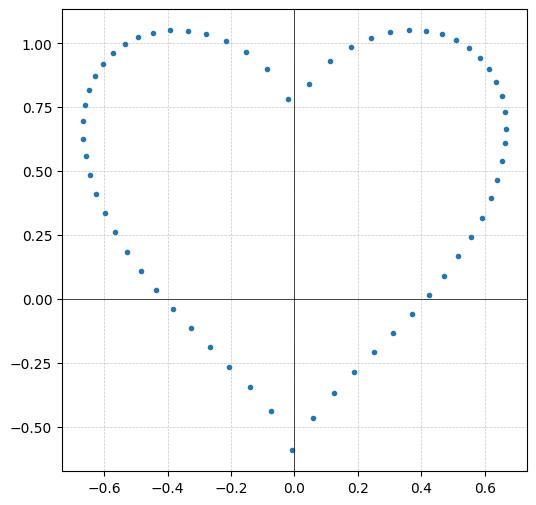

In [7]:
def scale_coords(coords):
    return coords * 1/1.5

xy_3 = np.apply_along_axis(scale_coords, 1, xy)

plot_presentation(xy_3)

In [8]:
result = []

In [9]:
def task_4_1(xy):
    start_time = time.time()
    xy_sym_1 = xy * np.array([-1, -1])
    end_time = time.time()

    plot_sym_1(xy, xy_sym_1)

    result.append(['np', end_time-start_time])

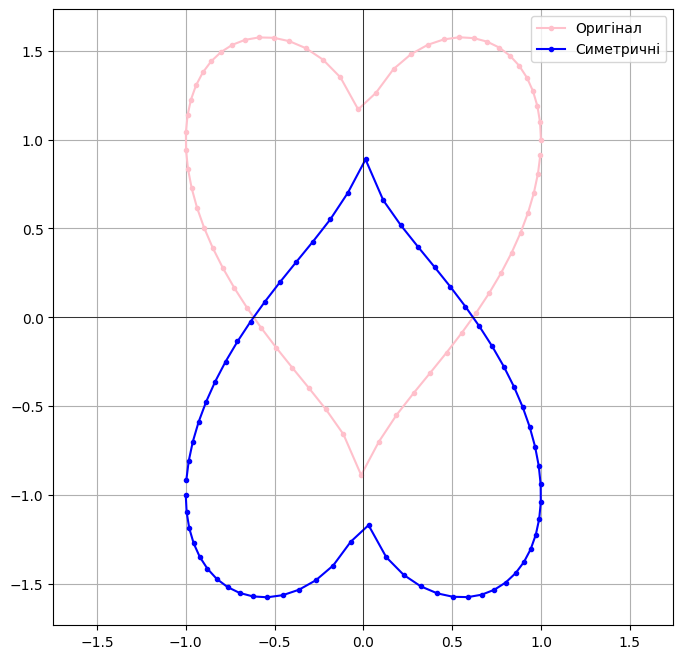

In [10]:
task_4_1(xy)

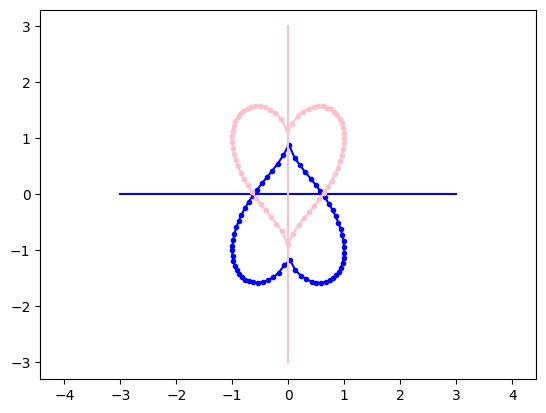

In [11]:
result_sym = np.zeros_like(xy)

start_time = time.time()
for i in range(xy.shape[0]):
    result_sym[i] = xy[i] * np.matrix([[-1, 0], [0, -1]])
end_time = time.time()

plot_sym(result_sym)

result.append(['matrix', end_time-start_time])

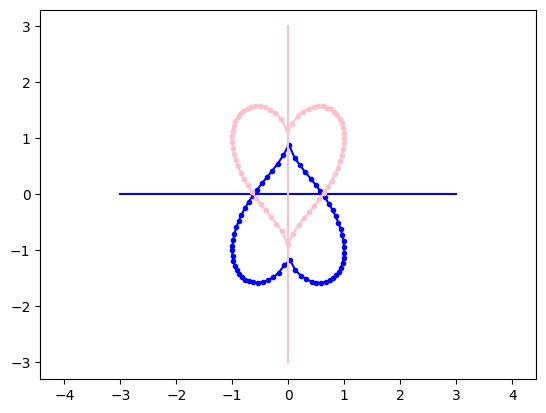

In [12]:
start_time = time.time()
xy_sym_3 = np.apply_along_axis(lambda point: -point, 1, xy)
end_time = time.time()

plot_sym(xy_sym_3)

result.append(['difficult', end_time-start_time])

In [13]:
df = pd.DataFrame(result, columns=['Function', 'Time'])
df_table = df.style.background_gradient(subset=["Time"], cmap="RdYlGn_r", vmin=0, vmax=0.001)
df_table

,Function,Time
0,np,0.000051
1,matrix,0.002967
2,difficult,0.000580


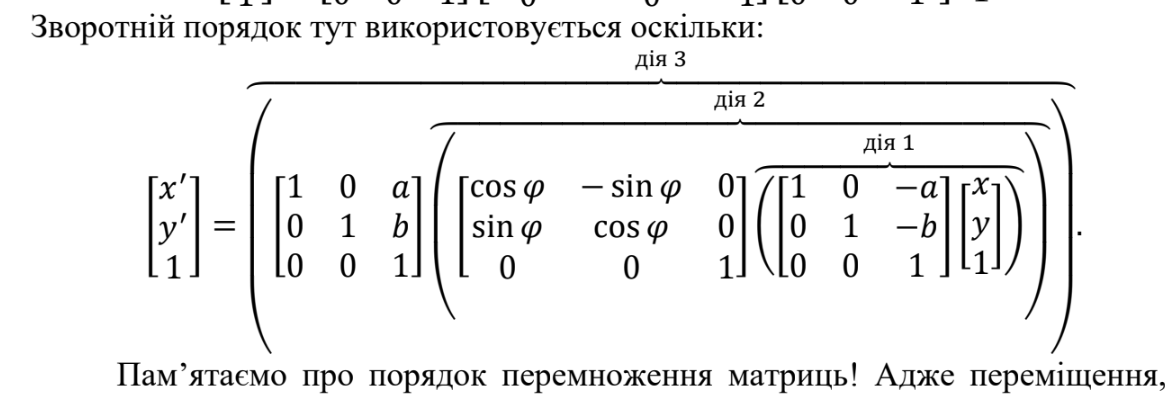

In [14]:
def plots_4(dots):
    
    first, second = np.array([-12, 30]), np.array([40, 50])
    k = (second[1] - first[1]) / (second[0] - first[0])
    b = first[1] - k * first[0]
    phi = np.arctan(k)
    
    columns = np.column_stack((dots, np.ones(len(dots))))
    
    def plot(result):
        plt.axhline(0, color='gray', linestyle='--')
        plt.axvline(0, color='gray', linestyle='--')
        plt.plot([first[0], second[0]], [first[1], second[1]], "g", linewidth=2)
        plt.plot(dots[:, 0], dots[:, 1], 'o-c')
        plt.plot(result[:, 0], result[:, 1], 'o-m')
        plt.grid(color='lightgray', linestyle=':')

        plt.legend()
        plt.axis('equal')
        plt.show()
    
    matrixs = [
        (np.array([[1, 0, 0], 
                   [0, 1, -b], 
                   [0, 0, 1]])), # (Translation)
        (np.array([[np.cos(-phi), np.sin(-phi), 0], 
                   [-np.sin(-phi), np.cos(-phi), 0], 
                   [0, 0, 1]])), # (Rotation)
        (np.array([[1, 0, 0], 
                   [0, -1, 0], 
                   [0, 0, 1]])), #відносно осі x
        (np.array([[np.cos(phi), np.sin(phi), 0], 
                   [-np.sin(phi), np.cos(phi), 0], 
                   [0, 0, 1]])),
        (np.array([[1, 0, 0], 
                   [0, 1, b], 
                   [0, 0, 1]]))
    ]
    
    result = columns.copy()

    for matrix in matrixs:

        result = np.dot(result,matrix.T)
        plot(result)

In [15]:
def plot_presentation(xy):
    plt.figure(figsize=(6, 6))
    plt.plot(xy[:, 0], xy[:, 1], '.') 

    plt.axhline(0, color='black', linewidth=0.5)  
    plt.axvline(0, color='black', linewidth=0.5)  


    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)


def plot_sym(xy_sym_1):
    plt.plot(xy_sym_1[:, 0], xy_sym_1[:, 1], ".-", [-3, 3], [0, 0], color = "blue")
    plt.plot(xy[:, 0], xy[:, 1], ".-", [0, 0], [-3, 3], color = "pink")
    plt.axis('equal')
    plt.show()

def plot_sym_1(xy_original, xy_symmetrical):
    plt.figure(figsize=(8, 8))
    
    plt.plot(xy_original[:, 0], xy_original[:, 1], ".-", color="pink", label="Оригінал")
    
    plt.plot(xy_symmetrical[:, 0], xy_symmetrical[:, 1], ".-", color="blue", label="Симетричні")
    
    plt.axhline(0, color='black', linewidth=0.5)  
    plt.axvline(0, color='black', linewidth=0.5)  
    
    plt.axis('equal')
    
    plt.legend()
    plt.grid(True)
    plt.show()

/var/folders/7y/jzj3rvbx3875_q5lqczlj3x00000gn/T/ipykernel_5735/2903222357.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


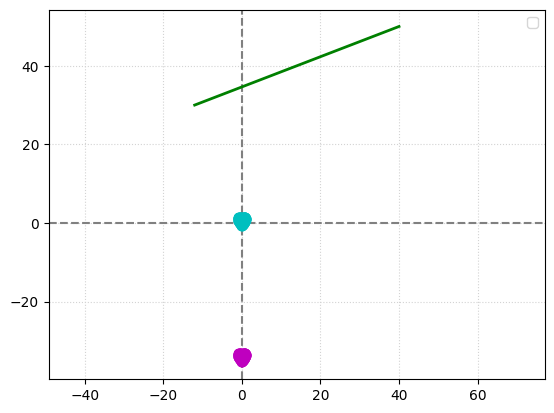

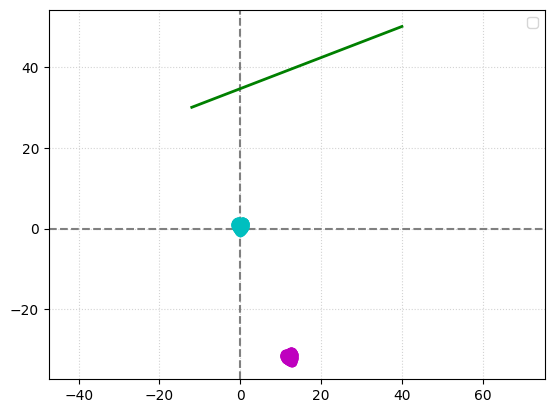

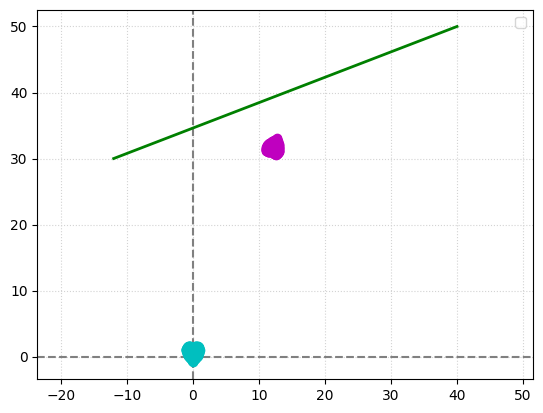

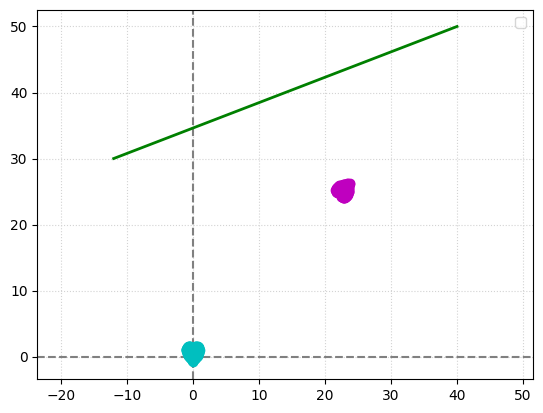

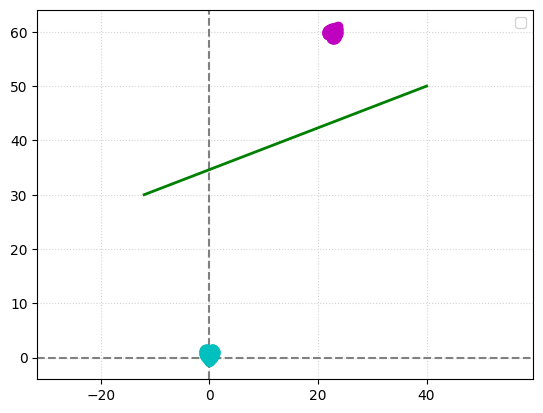

In [16]:
plots_4(xy)

In [17]:
df = pd.read_excel('./Варіанти.xlsx')

In [18]:
task = df[['X', 'Y']].to_numpy()

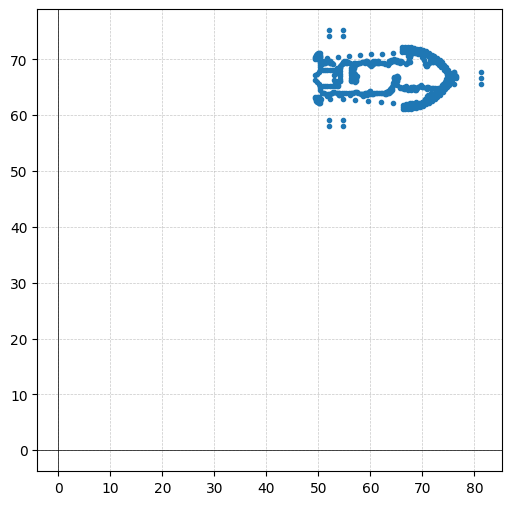

In [19]:
task_4(task)

/var/folders/7y/jzj3rvbx3875_q5lqczlj3x00000gn/T/ipykernel_5735/2903222357.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


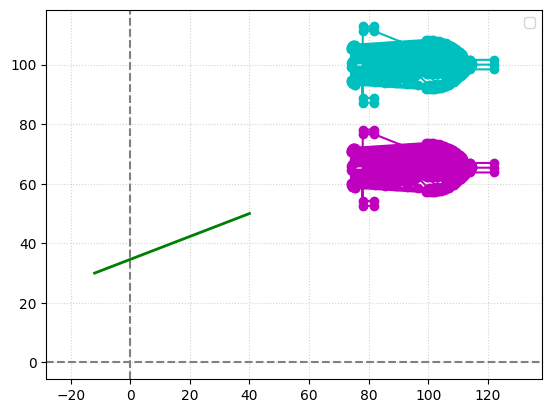

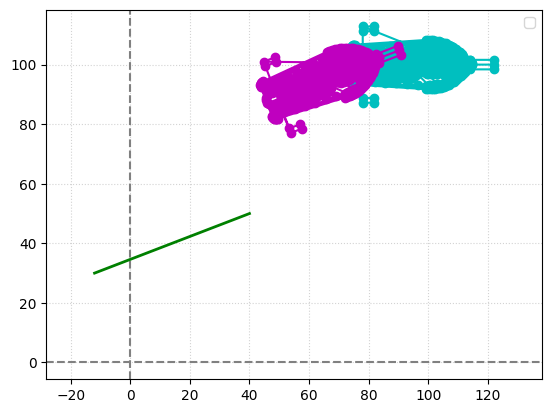

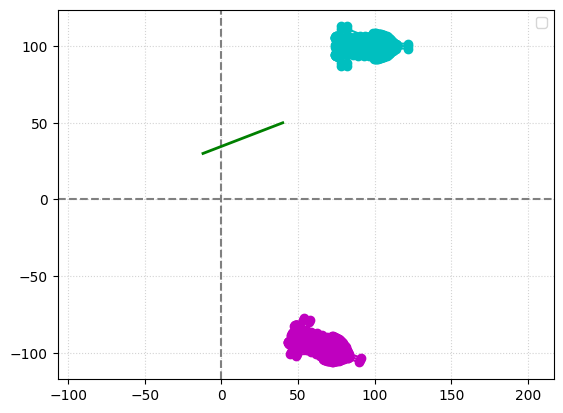

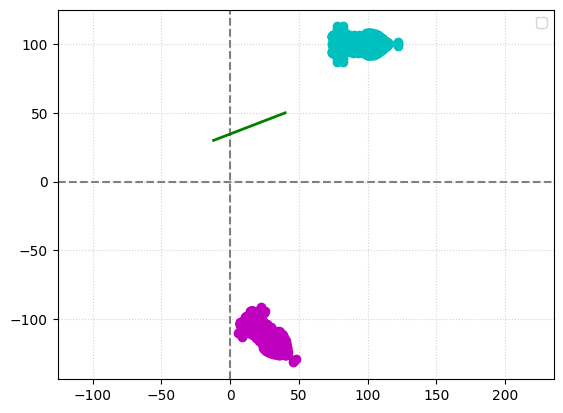

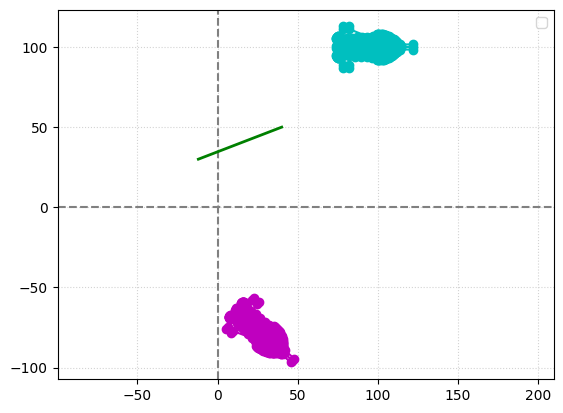

In [20]:
plots_4(task)

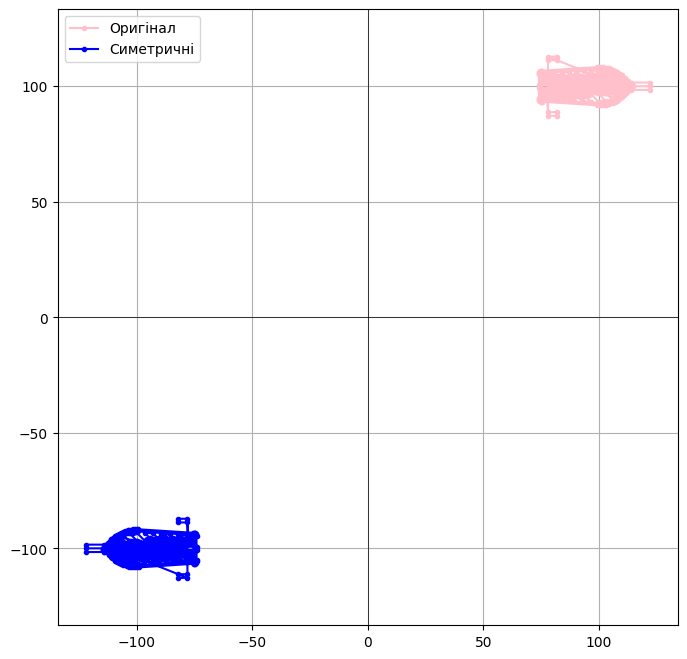

In [21]:
task_4_1(task)